Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data Collection & Analysis

In [2]:
df= pd.read_csv('insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Checking the toatal number of rows and columns
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#Statistical data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#Checking the missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

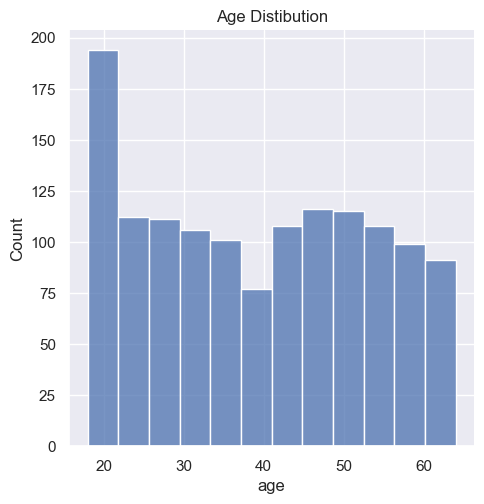

In [12]:
sns.set()
plt.figure(figsize=(8,8))
sns.displot(df['age'])
plt.title('Age Distibution')
plt.show()

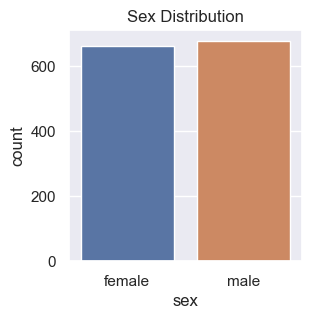

In [ ]:
#Gender Column
plt.figure(figsize=(3,3))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')  
plt.show()

In [13]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

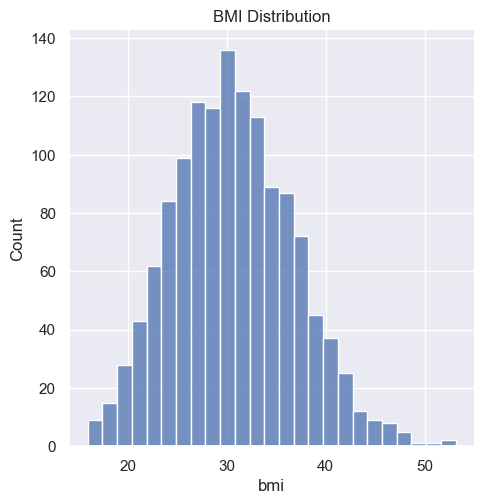

In [ ]:
#Bmi Distribution
plt.figure(figsize=(15,8))
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

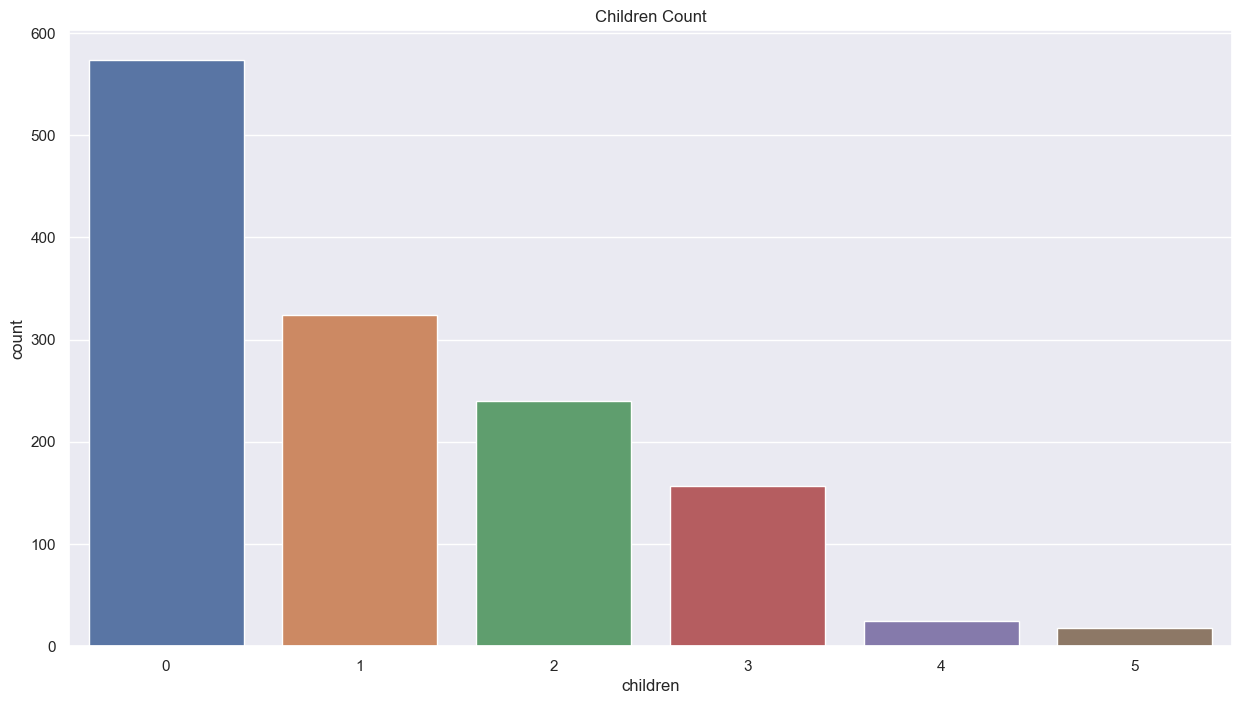

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x='children',data=df)
plt.title('Children Count')
plt.show()

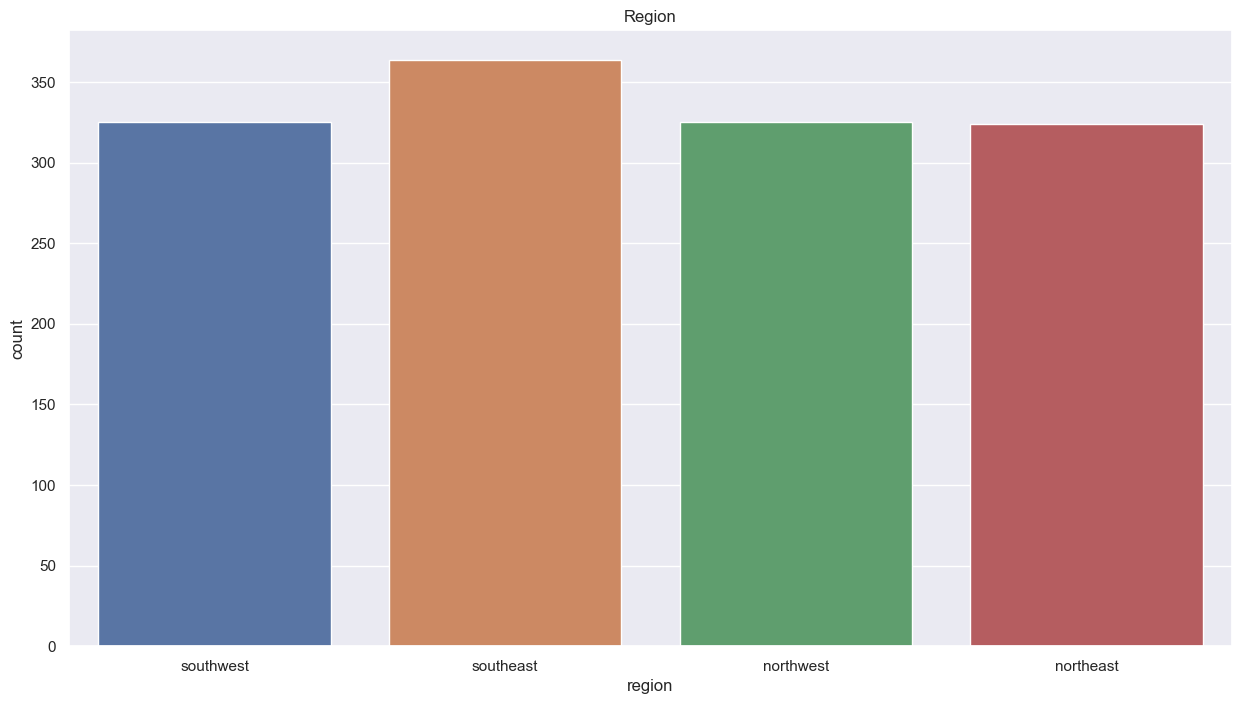

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

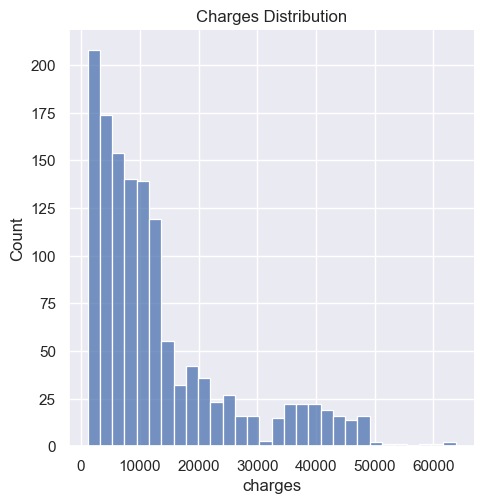

In [22]:
#Distribution of Charges
sns.set()
plt.figure(figsize=(15,8))
sns.displot(df['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing

In [28]:
#Encoding
#1st sex
df.replace({'sex':{'male':0,'female':1}},inplace=True)

df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

df.replace({'region':{'southeast':0,'southwest':1, 'northeast':2,'northwest':3}},inplace=True) 



Splitting the data

In [29]:
X=df.drop(columns='charges',axis=1)
y=df['charges']

In [30]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


Linear Regression

In [ ]:
#Model Training
regressor= LinearRegression()

In [33]:
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
#Model Evaluation
training_data_prediction= regressor.predict(X_train)

In [35]:
#R Squared Value
r2_train = metrics.r2_score(y_train,training_data_prediction)
print(r2_train)

0.751505643411174


In [36]:
testing_data_prediction= regressor.predict(X_test)

In [37]:
r2_test= metrics.r2_score(y_test,testing_data_prediction)
print(r2_test)

0.7447273869684077


Building a Predictive System

In [39]:
input_data= (31,1,25.74,0,1,0)
input_data_np= np.asarray(input_data)

#Reshaping
input_data_reshaped= input_data_np.reshape(1,-1)

prediction= regressor.predict(input_data_reshaped)
print(prediction[0])

3760.0805764960496


d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
